# HR Analytics Dataset

**Importing important Libraries and Loading Dataset.**

Numpy:- In this Project we are using 'Numpy' Library for Numbers Operation here.

Pandas:- In this Project we are using 'Pandas' Library for EDA and data related task.

Matplotlib:- 'Matplotlib' we are using for Visualization Purpose.

Seaborn:- With the help of 'Seaborn' we can visualize the data in advanced form.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading the dataset

df = pd.read_csv('HR Analytics.csv')
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [3]:
#Checking the null values

df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [4]:
#Coverting categorical column into numerical column

var = pd.get_dummies(df.sales, prefix='sales')
var2 = pd.get_dummies(df.salary, prefix='salary')
New_dataset = pd.concat([var,var2, df], axis='columns')

In [5]:
New_dataset

,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0,0,0,0,0,0,0,1,0,0,0,1,0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0,0,0,0,0,0,0,1,0,0,0,0,1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0,0,0,0,0,0,0,1,0,0,0,0,1,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0,0,0,0,0,0,0,1,0,0,0,1,0,0.72,0.87,5,223,5,0,1,0,sales,low
4,0,0,0,0,0,0,0,1,0,0,0,1,0,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0,0,0,0,0,0,0,0,1,0,0,1,0,0.40,0.57,2,151,3,0,1,0,support,low
14995,0,0,0,0,0,0,0,0,1,0,0,1,0,0.37,0.48,2,160,3,0,1,0,support,low
14996,0,0,0,0,0,0,0,0,1,0,0,1,0,0.37,0.53,2,143,3,0,1,0,support,low
14997,0,0,0,0,0,0,0,0,1,0,0,1,0,0.11,0.96,6,280,4,0,1,0,support,low


In [6]:
# Dropping Categorical column

New_dataset.drop('sales', axis='columns', inplace=True)
New_dataset.drop('salary', axis='columns', inplace=True)

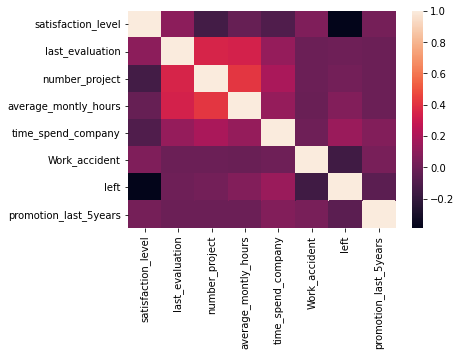

In [7]:
# Checking the Correalation between available column in dataset using heatmap (seaborn).

corr =df.corr()
sns.heatmap(corr)

In [8]:
#Seprating the features X
X = New_dataset.iloc[:,:-1]
X

,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left
0,0,0,0,0,0,0,0,1,0,0,0,1,0,0.38,0.53,2,157,3,0,1
1,0,0,0,0,0,0,0,1,0,0,0,0,1,0.80,0.86,5,262,6,0,1
2,0,0,0,0,0,0,0,1,0,0,0,0,1,0.11,0.88,7,272,4,0,1
3,0,0,0,0,0,0,0,1,0,0,0,1,0,0.72,0.87,5,223,5,0,1
4,0,0,0,0,0,0,0,1,0,0,0,1,0,0.37,0.52,2,159,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0,0,0,0,0,0,0,0,1,0,0,1,0,0.40,0.57,2,151,3,0,1
14995,0,0,0,0,0,0,0,0,1,0,0,1,0,0.37,0.48,2,160,3,0,1
14996,0,0,0,0,0,0,0,0,1,0,0,1,0,0.37,0.53,2,143,3,0,1
14997,0,0,0,0,0,0,0,0,1,0,0,1,0,0.11,0.96,6,280,4,0,1


In [9]:
#Seprating the features X

y = New_dataset.iloc[:,-1]
y

0        0
1        0
2        0
3        0
4        0
        ..
14994    0
14995    0
14996    0
14997    0
14998    0
Name: promotion_last_5years, Length: 14999, dtype: int64

In [10]:
#Importing tarin_test_split from sklearn

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state=0)

**LogisticRegression**

In [11]:

# importing 'StandardScaler' library then doing feature scaling for better accuracy.

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [12]:
# importing 'LogisticRegression' from sklearn and creating a model building.

from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()

In [13]:
# fitting model with training data

reg.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:

# Predicting the Model

reg.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [15]:
# checking the accuracy score there

reg.score(X_test, y_test)

0.9776666666666667

**RandomForestRegressor**

In [16]:
# Importing 'RandomForestRegressor'  from 'Ensemble' module using sklearn.

from sklearn.ensemble import RandomForestRegressor

In [17]:
# Creating a class with the name of Model and then passing how many tree we want to use in this algorithm.

model = RandomForestRegressor(n_estimators=50)

In [18]:

# Fitting our model on training dataset.

model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [19]:

# checking the accuracy level of Model.

model.score(X_test, y_test)


0.33868740172305845

As we have use few algorithm here. So you can see the better accuracy level according to algorithm below:

LogisticRegression :- As you have seen above in 'LogisticRegression' it's providing accuracy level = 97%.

RandomForestRegressor :- As you have seen above in 'RandomForestRegressor' it's providing accuracy level = 34%.

Note:- So as it clearly mentioned that we are getting higher accuracy level from 'LogisticRegression'. So we'll use it for our Model.